In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [30]:
df = pd.read_csv("../data/refined/german.csv")

In [31]:
df.head()

,status_of_existing_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_guarantors,...,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,creditability
0,< 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,>= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,Good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,Good
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad


In [32]:
X = df.drop(columns=["creditability"])
y = df["creditability"]
y = y.replace({'Good': 1,'Bad': 0})


/tmp/ipykernel_140808/2199674275.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Good': 1,'Bad': 0})


# Codifiy Qualitative Features

## Ordinal Features

In [33]:
# Define the mappings for ordinal variables
ordinal_mappings = {
    "status_of_existing_checking_account": {
        "< 0 DM": 1,
        "0 <= ... < 200 DM": 2,
        ">= 200 DM / salary assignments for at least 1 year": 3,
        "no checking account": 4,
    },
    "savings_account_bonds": {
        "< 100 DM": 1,
        "100 <= ... < 500 DM": 2,
        "500 <= ... < 1000 DM": 3,
        ">= 1000 DM": 4,
        "unknown/ no savings account": 5,
    },
    "present_employment_since": {
        "unemployed": 1,
        "< 1 year": 2,
        "1 <= ... < 4 years": 3,
        "4 <= ... < 7 years": 4,
        ">= 7 years": 5,
    },
}

# Replace the ordinal values
X = X.replace(ordinal_mappings)

/tmp/ipykernel_140808/437784982.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(ordinal_mappings)


# Categorical Features

In [6]:
# cat_mappings = {
#     'credit_history': {
#         'no credits taken/ all credits paid back duly': 'A30',
#         'all credits at this bank paid back duly': 'A31',
#         'existing credits paid back duly till now': 'A32',
#         'delay in paying off in the past': 'A33',
#         'critical account/ other credits existing (not at this bank)': 'A34'
#     },
#     'purpose': {
#         'car (new)': 'A40',
#         'car (used)': 'A41',
#         'furniture/equipment': 'A42',
#         'radio/television': 'A43',
#         'domestic appliances': 'A44',
#         'repairs': 'A45',
#         'education': 'A46',
#         '(vacation - does not exist?)': 'A47',
#         'retraining': 'A48',
#         'business': 'A49',
#         'others': 'A410'
#     },
#     'personal_status_and_sex': {
#         'male : divorced/separated': 'A91',
#         'female : divorced/separated/married': 'A92',
#         'male : single': 'A93',
#         'male : married/widowed': 'A94',
#         'female : single': 'A95'
#     },
#     'other_debtors_guarantors': {
#         'none': 'A101',
#         'co-applicant': 'A102',
#         'guarantor': 'A103'
#     },
#     'property': {
#         'real estate': 'A121',
#         'building society savings agreement/ life insurance': 'A122',
#         'car or other, not in attribute 6': 'A123',
#         'unknown / no property': 'A124'
#     },
#     'other_installment_plans': {
#         'bank': 'A141',
#         'stores': 'A142',
#         'none': 'A143'
#     },
#     'housing': {
#         'rent': 'A151',
#         'own': 'A152',
#         'for free': 'A153'
#     },
#     'job': {
#         'unemployed/ unskilled - non-resident': 'A171',
#         'unskilled - resident': 'A172',
#         'skilled employee / official': 'A173',
#         'management/ self-employed/ highly qualified employee/ officer': 'A174'
#     },
#     'telephone': {
#         'none': 'A191',
#         'yes, registered under the customers name': 'A192'
#     },
#     'foreign_worker': {
#         'yes': 'A201',
#         'no': 'A202'
#     },
# }

# # save categorical columns in a list

# cat_cols_list = [col for col in cat_mappings.keys()]

# X = X.replace(cat_mappings)

# X = pd.get_dummies(X, columns=cat_cols_list, drop_first=True)

---

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
# # Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


dv = DictVectorizer(sparse=False)
X_train_dv = dv.fit_transform(X_train.to_dict(orient="records"))

In [ ]:
# Create a logistic regression model
log_reg_model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    C=1.0,
)

# Train the model
log_reg_model.fit(X_train_dv, y_train)

/home/jarvis/Documents/Github/machine-learning-zoomcamp-capstone-project/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=5000)

In [41]:
X_test_dv = dv.transform(X_test.to_dict(orient="records"))

# Get probability predictions
y_pred_proba = log_reg_model.predict_proba(X_test_dv)

# Use a higher threshold for predicting good credit (class 1)
# Default is 0.5, let's try 0.6
y_pred = (y_pred_proba[:, 1] >= 0.6).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# auc = roc_auc_score(y_val, y_pred)


Accuracy: 0.672
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.75      0.57        72
           1       0.86      0.64      0.74       178

    accuracy                           0.67       250
   macro avg       0.66      0.70      0.65       250
weighted avg       0.75      0.67      0.69       250



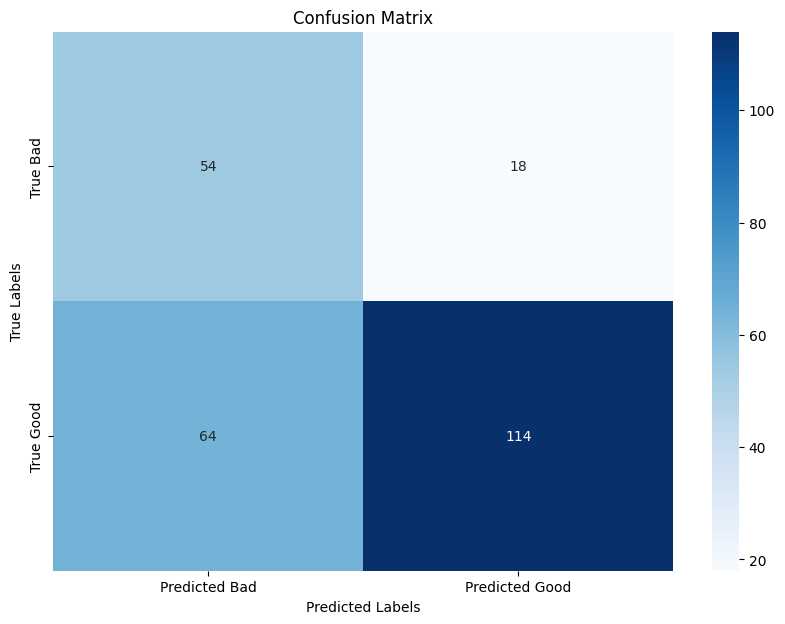

In [42]:

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Bad', 'Predicted Good'], yticklabels=['True Bad', 'True Good'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
import pickle

# Save the model
with open("../models/log_reg_model.pkl", "wb") as file:
    pickle.dump(log_reg_model, file)

---

Decision Tree Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50        72
           1       0.80      0.81      0.81       178

    accuracy                           0.72       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.72      0.72      0.72       250



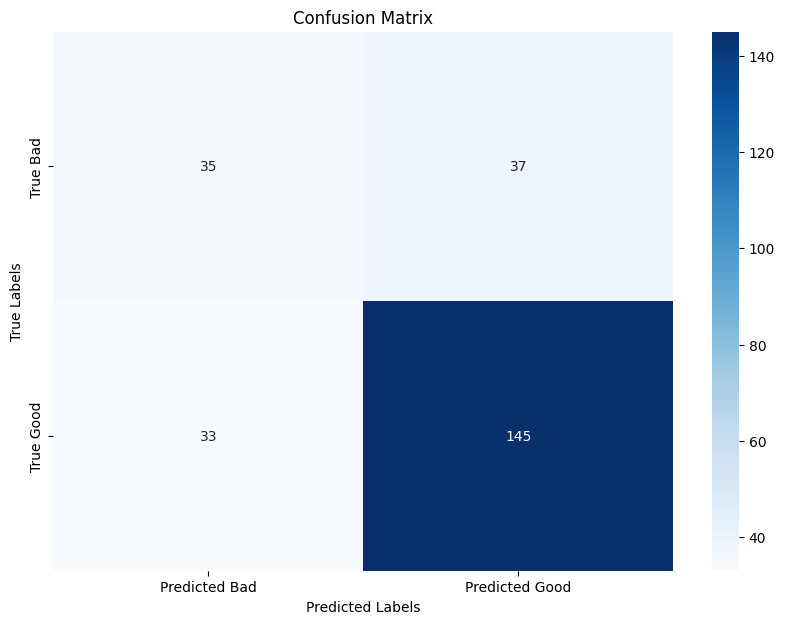

In [15]:
# Train Decision Tree model with class_weight='balanced'
decision_tree = DecisionTreeClassifier(class_weight="balanced")
decision_tree.fit(X_train_scaled, y_train)
y_pred_decision_tree = decision_tree.predict(X_test_scaled)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {decision_tree_accuracy}")

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)
class_report = classification_report(y_test, y_pred_decision_tree)

print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted Bad", "Predicted Good"],
    yticklabels=["True Bad", "True Good"],
)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Random Forest Accuracy: 0.776
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50        72
           1       0.80      0.81      0.81       178

    accuracy                           0.72       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.72      0.72      0.72       250



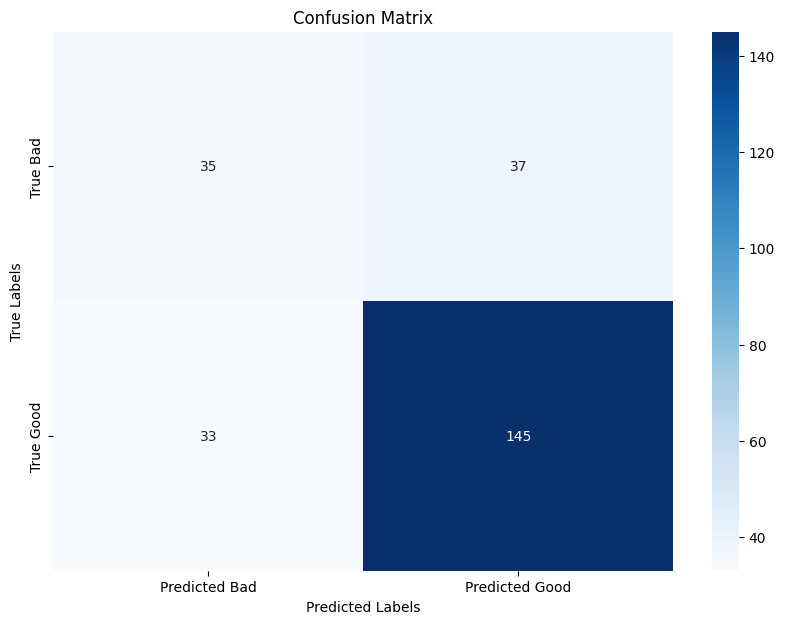

In [16]:
# Train Random Forest model
random_forest = RandomForestClassifier(class_weight="balanced")
random_forest.fit(X_train_scaled, y_train)
y_pred_random_forest = random_forest.predict(X_test_scaled)
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
print(f"Random Forest Accuracy: {random_forest_accuracy}")

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)
class_report = classification_report(y_test, y_pred_decision_tree)

print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted Bad", "Predicted Good"],
    yticklabels=["True Bad", "True Good"],
)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

SVM Accuracy: 0.772
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50        72
           1       0.80      0.81      0.81       178

    accuracy                           0.72       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.72      0.72      0.72       250



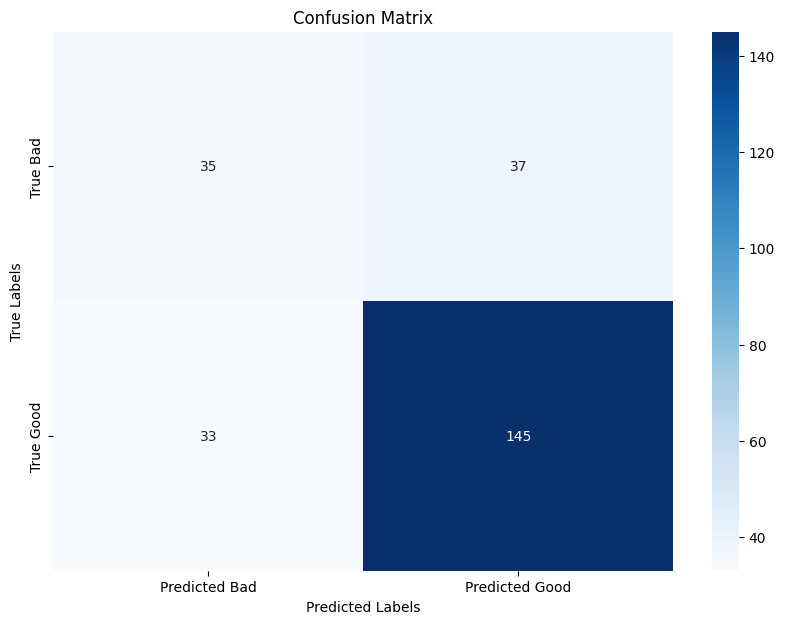

In [17]:
# Train Support Vector Machine model
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy}")


# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)
class_report = classification_report(y_test, y_pred_decision_tree)

print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted Bad", "Predicted Good"],
    yticklabels=["True Bad", "True Good"],
)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Compare model accuracies
model_accuracies = {
    "Decision Tree": decision_tree_accuracy,
    "Random Forest": random_forest_accuracy,
    "SVM": svm_accuracy
}

best_model = max(model_accuracies, key=model_accuracies.get)
print(f"Best model: {best_model} with accuracy {model_accuracies[best_model]}")

Best model: Random Forest with accuracy 0.776
